### Oppgave 3d: Implementere Eulers metode

Løs Lane-Emden numerisk for n = 1, og sammenlign med den analytiske løsningen.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def step_euler(y,t, h, f, n, alpha=0):
    ''' Performs one step of Euler's method. '''
    return y + h*f(y,t, n, alpha)

def step_RK4(y,t, h, f, n, alpha=0):
    ''' Calculates all k's and takes on RK4-step '''
    k1 = f(y,t, n, alpha)
    k2 = f(y + h*k1/2, t+h/2, n, alpha)
    k3 = f(y+h*k2/2, t+h/2, n, alpha)
    k4 = f(y+h*k3, t+h, n, alpha)
    return y + (h/6)*(k1+2*k2+2*k3+k4)

def lane_emden_analytical(t):
    return np.sin(t)/t

def lane_emden(y, t, n, alpha):
    #assert(y[0]>0) #this exception is caught so that no runtimeerrors are casted! (when n=3/2 runtimeerror, since it does not work on negative numbers)
    return np.array([y[1], -y[0]**(n)-2*y[1]/t])

def full_numerical_method(h, n, method="euler", y_0 = [1,0], start_t = 0.01, f = lane_emden, alpha=1):
    ''' Performs all steps in selected method. Made one general function for both Euler and RK4 '''
    try:
        t_list = np.zeros(1)
        y_list = np.zeros((1,2))
        t_list[0] = start_t
        y_list[0] = y_0
        i = 0
        if method == "euler":
            next_value = step_euler(y_list[i], t_list[i], h, f, n)
            while next_value[0] > 0:
                t_list = np.append(t_list, t_list[i]+h)
                y_list = np.vstack((y_list, next_value))
                y_list[i+1] = next_value
                i+=1
                next_value = step_euler(y_list[i], t_list[i], h, f, n)
        elif method == "RK4":
            next_value = step_RK4(y_list[i], t_list[i], h, f, n)
            while next_value[0] > 0:
                t_list = np.append(t_list, t_list[i]+h)
                y_list = np.vstack((y_list, next_value))
                y_list[i+1] = next_value
                i+=1
                next_value = step_RK4(y_list[i], t_list[i], h, f, n)
        return t_list, y_list
    except AssertionError:
        print("AssertionError: De negative theta-verdiene tas ikke med!")
        return t_list, y_list

def simple_plot(t, y, h, n, anal=False, savefig=False, filename="simple_plot.pdf"):
    ''' Simple plot for these tasks. 
    anal = False (default) does not plot the analytical function, True does. 
    savefig = False (default) does not save plot to PDF. True saves to default filename ""simple_plot.pdf"
    n = given as the value you want to use, not the list n.
    '''
    if anal == True:
        plt.plot(t[0], lane_emden_analytical(t[0]), label="Analytisk")
    for i in range(len(h)):
        plt.plot(t[i], y[i][:,0], label="h = "+str(h[i]))
    plt.xlabel(r'$\xi$')
    plt.ylabel(r'$\theta(\xi)$')
    plt.title(r'$n = '+str(n)+'$')
    plt.legend(loc='upper right')
    if savefig == True:
        plt.savefig(filename, bbox_inches='tight')
    plt.show()
    
def get_values(h, n, method="euler", y_0 = [1,0], start_t = 0.01, f = lane_emden):
    ''' made to get rid of some repetitiveness in gettin values from full_numerical_method for every value of h '''
    list_of_t_lists = []
    list_of_y_lists = []
    for i in range(len(h)):
        t_list, y_list = full_numerical_method(h[i], n, method, y_0, start_t, f)
        list_of_t_lists.append(t_list)
        list_of_y_lists.append(y_list)
    return list_of_t_lists, list_of_y_lists

h = [0.01, 0.001, 0.0001]
n = [1, 3/2, 3]

#list_of_t_lists, list_of_y_lists = get_values(h, n[0])
#simple_plot(list_of_t_lists, list_of_y_lists, h, n[0], True)
print("Done")

Done


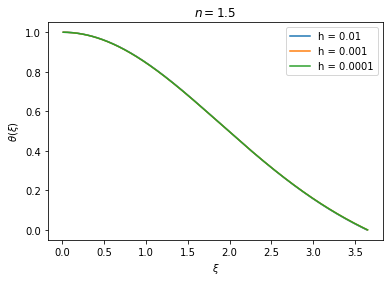

ξ_N = 3.6399999999999664 h = 0.01, n = 1.5
ξ_N²|θ'(ξ_N)|= 2.730306719977897 h = 0.01, n = 1.5

ξ_N = 3.651999999999709 h = 0.001, n = 1.5
ξ_N²|θ'(ξ_N)|= 2.7157498719926205 h = 0.001, n = 1.5

ξ_N = 3.6536000000032858 h = 0.0001, n = 1.5
ξ_N²|θ'(ξ_N)|= 2.714316554915793 h = 0.0001, n = 1.5



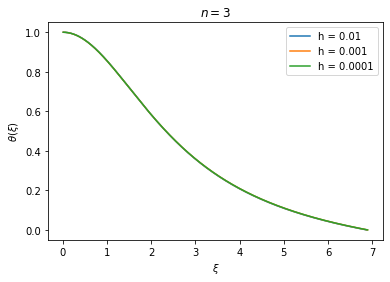

ξ_N = 6.869999999999898 h = 0.01, n = 3
ξ_N²|θ'(ξ_N)|= 2.011690562696497 h = 0.01, n = 3

ξ_N = 6.894000000000637 h = 0.001, n = 3
ξ_N²|θ'(ξ_N)|= 2.017581823996517 h = 0.001, n = 3

ξ_N = 6.896299999997266 h = 0.0001, n = 3
ξ_N²|θ'(ξ_N)|= 2.018171559467777 h = 0.0001, n = 3



In [2]:
#task 3e)
#Solved in non-relativistic and ultra-relativistic cases!
#RK4 should not be used here! Here only Euler should be used!

def print_values(list_of_t_lists, list_of_y_lists, h, n):
    ''' n is supplied not as a list, but as the n that should be displayed'''
    for i in range(len(h)):
        print('ξ_N =',list_of_t_lists[i][-1], "h = "+str(h[i])+", n = "+str(n))
        print("ξ_N²|θ'(ξ_N)|=", list_of_t_lists[i][-1]**2*np.abs((list_of_y_lists[i][:,0][-1]-list_of_y_lists[i][:,0][-2])/h[i]), "h = "+str(h[i])+", n = "+str(n))
        print()
        
#Utskriften viser at det siste punktet muligens ikke kommer med? (siden Ksi_N som er oppgitt ikke treffes her. )
#Noe jeg kanskje skal sjekke?
#Koden i colab får det til ser jeg!
        
        
list_of_t_lists_euler_non, list_of_y_lists_euler_non = get_values(h, n[1])
simple_plot(list_of_t_lists_euler_non, list_of_y_lists_euler_non, h, n[1])
print_values(list_of_t_lists_euler_non, list_of_y_lists_euler_non, h, n[1])

list_of_t_lists_euler_ultra, list_of_y_lists_euler_ultra = get_values(h, n[2])
simple_plot(list_of_t_lists_euler_ultra, list_of_y_lists_euler_ultra, h, n[2])
print_values(list_of_t_lists_euler_ultra, list_of_y_lists_euler_ultra, h, n[2])


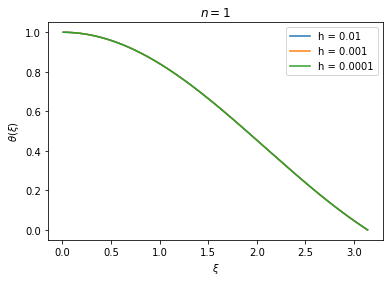

In [3]:
#task 3f)
#same as 3d when it comes to plotting. 

list_of_t_lists_kutta, list_of_y_lists_kutta = get_values(h, n[0], "RK4")
simple_plot(list_of_t_lists_kutta, list_of_y_lists_kutta, h, n[0])

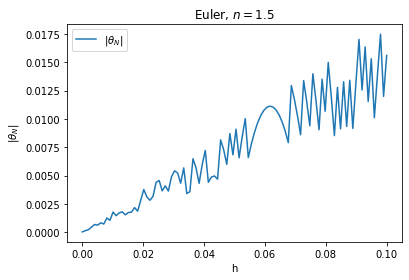

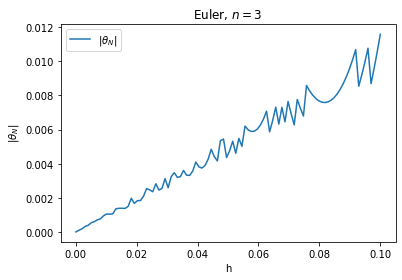

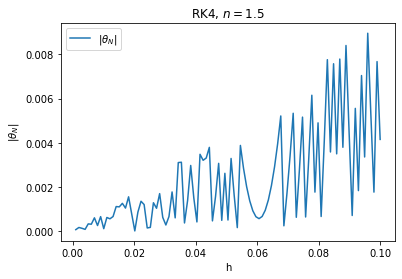

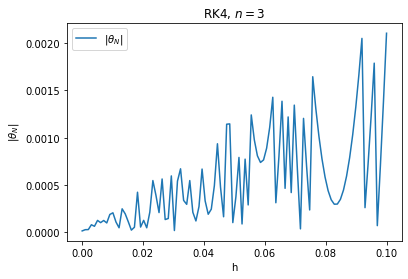

Done


In [4]:
#3g)
#Plot the global error from both methods as a function of h
#Need to find the solutions for continuous h-values for both RK4 and Euler.

import warnings
warnings.filterwarnings('ignore') #To stop runtimewarnings because of n = 3/2 and negative y[0]!

ksiN = [3.65375, 6.89685] #Kommer nesten helt dit med h = 0.00001

def fixed_full_euler_or_RK4(h, f, n=n[0], method="euler", y_0 = [1,0], start_t = 0.01, end_t = ksiN[0], alpha=1):
    ''' Performs all steps in RK4 or Euler, this time all the way to end_t. '''
    #try: 
    N = int((end_t - start_t)/h) 
    t_list = np.linspace(start_t, end_t, N+1) 
    y_list = np.zeros((N+1,2))
    #t_list[0] = start_t
    y_list[0] = y_0
    if method == "euler":
        for i in range(N):
            next_value = step_euler(y_list[i], t_list[i], h, f, n, alpha)
            y_list[i+1] = next_value
    elif method == "RK4":
        for i in range(N):
            next_value = step_RK4(y_list[i], t_list[i], h, f, n, alpha)
            y_list[i+1] = next_value
    return t_list, y_list
    #except:
     #   print("AssertionError: De negative theta-verdiene tas ikke med!")
      #  return t_list, y_list

def global_error(theta_list):
    ''' Finds global error of one theta, which depends on the h-value used to solve the equation '''
    return np.abs(theta_list[-1])
    #return np.full(len(h_values),np.abs(y_list[:,0][-1]))

def global_error_vs_h_values(h_values, f, n=n[0], method="euler", y_0 = [1,0], start_t = 0.01, end_t = ksiN[0]):
    ''' 
    Takes y-list from method and h-values. 
    Returns numpy array of global_error that later may be plotted against h (in correct dimensions)
    '''
    global_error_list = np.zeros(len(h_values))
    for i in range(len(h_values)):
        t_list, y_list = fixed_full_euler_or_RK4(h_values[i], f, n, method, y_0, start_t, end_t)
        theta_list = y_list[:,0]
        global_error_list[i] = global_error(theta_list)
    return global_error_list

def plot_y_vs_h(y_list, h_values, title, savefig=False, filename="global_error.pdf",label=r'$|\theta_N|$', xlabel=r'h', ylabel=r'$|\theta_N|$'):
    plt.plot(h_values, y_list, label=label)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    #plt.xscale('log')
    #plt.yscale('log')
    plt.legend(loc="upper left")
    if savefig == True:
        plt.savefig(filename, bbox_inches='tight')
    plt.show()
    
h_values = np.linspace(5e-5,0.1, 100) #E.g. ''
n = [3/2, 3]

global_errorsE1 = global_error_vs_h_values(h_values, lane_emden, n[0], "euler", [1,0], 0.01, ksiN[0])
#plot_y_vs_h(global_errorsE1, h_values, r'Euler, $n='+str(n[0])+'$', True, "globEuNon.pdf")
plot_y_vs_h(global_errorsE1, h_values, r'Euler, $n='+str(n[0])+'$')

global_errorsE2 = global_error_vs_h_values(h_values, lane_emden, n[1], "euler", [1,0], 0.01, ksiN[1])
#plot_y_vs_h(global_errorsE2, h_values, r'Euler, $n='+str(n[1])+'$', True, "globEuUltra.pdf")
plot_y_vs_h(global_errorsE2, h_values, r'Euler, $n='+str(n[1])+'$')


global_errorsKutta1 = global_error_vs_h_values(h_values, lane_emden, n[0], "RK4", [1,0], 0.01, ksiN[0])
#plot_y_vs_h(global_errorsKutta1, h_values, r'RK4, $n='+str(n[0])+'$', True, "globRK4Non.pdf")
plot_y_vs_h(global_errorsKutta1, h_values, r'RK4, $n='+str(n[0])+'$')

global_errorsKutta2 = global_error_vs_h_values(h_values, lane_emden, n[1], "RK4",[1,0], 0.01, ksiN[1])
#plot_y_vs_h(global_errorsKutta2, h_values, r'RK4, $n='+str(n[1])+'$', True, "globRK4Ultra.pdf")
plot_y_vs_h(global_errorsKutta2, h_values, r'RK4, $n='+str(n[1])+'$')

#Experiments with logarithmic scales: 
h_values_log = np.logspace(-4,0,100) #Try with log-scale too.
#global_errorsELog1 = global_error_vs_h_values(h_values_log, lane_emden, n[0], "euler", [1,0], 0.01, ksiN[0])
#plot_y_vs_h(global_errorsELog1, h_values, r'Log Euler, $n='+str(n[0])+'$')

#global_errorsELog2 = global_error_vs_h_values(h_values_log, lane_emden, n[1], "euler", [1,0], 0.01, ksiN[1])
#plot_y_vs_h(global_errorsELog2, h_values, r'Log Euler, $n='+str(n[1])+'$')

#global_errorsKuttaLog1 = global_error_vs_h_values(h_values_log, lane_emden, n[0], "RK4", [1,0], 0.01, ksiN[0])
#plot_y_vs_h(global_errorsKuttaLog1, h_values, r'Log RK4, $n='+str(n[0])+'$')

#global_errorsKuttaLog2 = global_error_vs_h_values(h_values_log, lane_emden, n[1], "RK4", [1,0], 0.01, ksiN[1])
#plot_y_vs_h(global_errorsKuttaLog2, h_values, r'Log RK4, $n='+str(n[1])+'$')

print("Done")

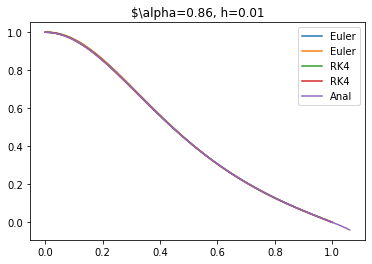

In [5]:
#Oppgave 3i)

alpha_values = [0.86, 0.59, 0.0167]

def TOV_anal_normal(x, alpha):
    ''' Analytical and normalized solution of TOV '''
    sol = (np.sqrt(1-alpha)-np.sqrt(1-alpha*x**2))/(np.sqrt(1-alpha*x**2)-3*np.sqrt(1-alpha))
    P_bar0 = (np.sqrt(1-alpha)-1)/(1-3*np.sqrt(1-alpha))
    return sol/P_bar0

#Based on earlier plots I think that h = 0.0001 is sufficiently small, but I can test, just as in the other tasks. 
def TOV(y,x,n,alpha):
    return -(1/2)*alpha*x*(1+y)*(1+3*y)*(1-alpha*x**2)**(-1)

def start_value(alpha):
    return (np.sqrt(1-alpha)-1)/(1-3*np.sqrt(1-alpha))
               
h = [0.01, 0.001, 0.0001]
x = np.linspace(0,3,100)

x_list, y_list = fixed_full_euler_or_RK4(h[0], TOV, False, "euler", start_value(alpha_values[0]), 0, 1, alpha_values[0])
x_list1, y_list1 = fixed_full_euler_or_RK4(h[0], TOV, False, "RK4", start_value(alpha_values[0]), 0, 1, alpha_values[0])
plt.plot(x_list, y_list/start_value(alpha_values[0]), label="Euler")
plt.plot(x_list1, y_list1/start_value(alpha_values[0]), label="RK4")
plt.plot(x, TOV_anal_normal(x,alpha_values[0]), label="Anal")
plt.legend(loc="upper right")
plt.title(r"$\alpha="+str(alpha_values[0])+", h="+str(h[0]))
plt.show()

#Gjør det samme flere ganger!
#Analyser hvilken h som burde brukes!
#Lag en plotte-funksjon også, så blir det mye mindre skriving!!

In [6]:
#Oppgave 3j)
#Også plotte Newtons approksimasjon
def Newton_approx(x, alpha):
    return (1/4)*alpha*(1-x**2)
#De samme plottene som i j, men denne gangen med Newtons_approx i tillegg!

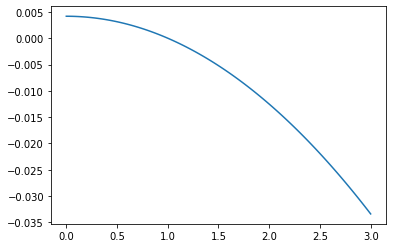

In [7]:


plt.plot(x,Newton_approx(x,alpha_values[2]))
plt.show()